# Practicas In Silico medicine 2017: CNVs

## Intro
 


## Tasks
* calculate coverage per base
* concatenate coverages
* load in Pandas
* get biomart info
* load biomart info
* calculate summaries
* plot



In [177]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pprint
from datetime import datetime

%matplotlib inline

pp = pprint.PrettyPrinter(indent=4)
pp = pp.pprint

print("Pandas version: {}".format(pd.__version__))

# get data and current dir
cwd = os.getcwd()
print ( 'current dir is: "' + cwd + '"')


date_time = datetime.now().strftime('%Y-%m-%d_%H_%M_%S')
date = datetime.now().strftime('%Y-%m-%d')
print("date: "+ date)
print("date_time = " + date_time)

Pandas version: 0.20.2
current dir is: "/Users/pmg/workspace/docencia_scripts/bioinfo_master-2017/CNVs/coverage_ngs"
date: 2017-11-30
date_time = 2017-11-30_12_08_34


In [165]:
# config
self = {
    "config" : {
        "project" : "CNV_in_silico_medicine-2017",
        "cov_matrix_file":"",
        "analysis_folder_path" : "/Volumes/miniSD/tmp_misc/code/coverages_data-test/class_2017",
        "bams_path" : '',
        "vcfs_path" : '',
        "QC_path" : '',
        "biomart_ori_file": "mart_export.txt",
        "biomart_gff_file": "biomart.gff",
        "cpb_fof": 'cpb_depth.fof',
        "individuals": [2,3,9,10,11,12,13,14]
    },
    'data':{
        'sample_list':None,
        'fastq_df': None,
        'ref_b37': ''
    },

}

## Biomart file

Biomart query

    <?xml version="1.0" encoding="UTF-8"?>
    <!DOCTYPE Query>
    <Query  virtualSchemaName = "default" formatter = "TSV" header = "0" uniqueRows = "0" count = "" datasetConfigVersion = "0.6" >

        <Dataset name = "hsapiens_gene_ensembl" interface = "default" >
            <Filter name = "hgnc_symbol" value = "BRCA1,SMARCB1,MYCN"/>
            <Filter name = "transcript_gencode_basic" excluded = "0"/>
            <Attribute name = "ensembl_gene_id" />
            <Attribute name = "ensembl_transcript_id" />
            <Attribute name = "external_gene_name" />
            <Attribute name = "chromosome_name" />
            <Attribute name = "start_position" />
            <Attribute name = "end_position" />
            <Attribute name = "exon_chrom_start" />
            <Attribute name = "exon_chrom_end" />
            <Attribute name = "rank" />
            <Attribute name = "phase" />
            <Attribute name = "cdna_coding_start" />
            <Attribute name = "ensembl_exon_id" />
            <Attribute name = "strand" />
        </Dataset>
    </Query>


### Read the biomart export

first see the columns

    [devel|GRCh37|ens-75]$ transpose_first_two_lines.sh mart_export.txt
    [0] Ensembl Gene ID = ENSG00000012048
    [1] Ensembl Transcript ID = ENST00000357654
    [2] Associated Gene Name = BRCA1
    [3] Chromosome Name = 17
    [4] Gene Start (bp) = 41196312
    [5] Gene End (bp) = 41277500
    [6] Exon Chr Start (bp) = 41277288
    [7] Exon Chr End (bp) = 41277387
    [8] Exon Rank in Transcript = 1
    [9] start phase = -1
    [10] cDNA coding start =     
    [11] Ensembl Exon ID = ENSE00001871077
    [12] Strand = -1

### Load the mart data


In [140]:
analysis_folder_path = self['config']['analysis_folder_path']
biomart_out = analysis_folder_path +'/'+self['config']['biomart_ori_file']
print(biomart_out)
biomart_df = pd.read_csv(biomart_out, header=0, sep="\t")
biomart_df

/Volumes/miniSD/tmp_misc/code/coverages_data-test/class_2017/mart_export.txt


,Gene stable ID,Transcript stable ID,Gene name,Chromosome/scaffold name,Gene start (bp),Gene end (bp),Exon region start (bp),Exon region end (bp),Exon rank in transcript,Start phase,cDNA coding start,Exon stable ID,Strand
0,ENSG00000099956,ENST00000344921,SMARCB1,22,24129150,24176703,24129150,24129449,1,-1,208.0,ENSE00000879478,1
1,ENSG00000099956,ENST00000344921,SMARCB1,22,24129150,24176703,24135746,24135875,3,1,413.0,ENSE00000651413,1
2,ENSG00000099956,ENST00000344921,SMARCB1,22,24129150,24176703,24143131,24143322,4,2,543.0,ENSE00001385887,1
3,ENSG00000099956,ENST00000344921,SMARCB1,22,24129150,24176703,24133943,24134054,2,0,301.0,ENSE00001380326,1
4,ENSG00000099956,ENST00000344921,SMARCB1,22,24129150,24176703,24145482,24145609,5,2,735.0,ENSE00003588634,1
5,ENSG00000099956,ENST00000344921,SMARCB1,22,24129150,24176703,24158957,24159123,6,1,863.0,ENSE00000651422,1
6,ENSG00000099956,ENST00000344921,SMARCB1,22,24129150,24176703,24167412,24167602,7,0,1030.0,ENSE00000651425,1
7,ENSG00000099956,ENST00000344921,SMARCB1,22,24129150,24176703,24175759,24175890,8,2,1221.0,ENSE00000651428,1
8,ENSG00000099956,ENST00000344921,SMARCB1,22,24129150,24176703,24176328,24176703,9,2,1353.0,ENSE00000879482,1
9,ENSG00000099956,ENST00000263121,SMARCB1,22,24129150,24176703,24133943,24134081,2,0,290.0,ENSE00001224609,1


In [141]:
# how many genes are we studying
biomart_df.iloc[:,2].value_counts()

BRCA1      238
PTCH1      172
SMARCB1     35
PTEN         9
MYCN         3
Name: Gene name, dtype: int64

### fix names

    [0] Ensembl Gene ID = ensg_id
    [1] Ensembl Transcript ID = enst_id
    [2] Associated Gene Name = gene
    [3] Chromosome Name = chr
    [4] Gene Start (bp) = start
    [5] Gene End (bp) = end
    [6] Exon Chr Start (bp) = exon_start
    [7] Exon Chr End (bp) = exon_end
    [8] Exon Rank in Transcript = exon_rank
    [9] start phase = start_phase
    [10] cDNA coding start = cdna_coding_start
    [11] Ensembl Exon ID = ense_id
    [12] Strand = strand
    
    ["ensg_id", "enst_id","gene", "chr","start","end","exon_start", "exon_end","exon_rank","start_phase","cdna_coding_start"]

In [143]:
header_names = ["ensg_id"
                , "enst_id"
                ,"gene"
                , "chr"
                ,"start"
                ,"end"
                ,"exon_start"
                , "exon_end"
                ,"exon_rank"
                ,"start_phase"
                ,"cdna_coding_start"
                ,"ense_id"
                ,"strand"
               ]

# rename header
#https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
biomart_df.columns = header_names

biomart_df

,ensg_id,enst_id,gene,chr,start,end,exon_start,exon_end,exon_rank,start_phase,cdna_coding_start,ense_id,strand
0,ENSG00000099956,ENST00000344921,SMARCB1,22,24129150,24176703,24129150,24129449,1,-1,208.0,ENSE00000879478,1
1,ENSG00000099956,ENST00000344921,SMARCB1,22,24129150,24176703,24135746,24135875,3,1,413.0,ENSE00000651413,1
2,ENSG00000099956,ENST00000344921,SMARCB1,22,24129150,24176703,24143131,24143322,4,2,543.0,ENSE00001385887,1
3,ENSG00000099956,ENST00000344921,SMARCB1,22,24129150,24176703,24133943,24134054,2,0,301.0,ENSE00001380326,1
4,ENSG00000099956,ENST00000344921,SMARCB1,22,24129150,24176703,24145482,24145609,5,2,735.0,ENSE00003588634,1
5,ENSG00000099956,ENST00000344921,SMARCB1,22,24129150,24176703,24158957,24159123,6,1,863.0,ENSE00000651422,1
6,ENSG00000099956,ENST00000344921,SMARCB1,22,24129150,24176703,24167412,24167602,7,0,1030.0,ENSE00000651425,1
7,ENSG00000099956,ENST00000344921,SMARCB1,22,24129150,24176703,24175759,24175890,8,2,1221.0,ENSE00000651428,1
8,ENSG00000099956,ENST00000344921,SMARCB1,22,24129150,24176703,24176328,24176703,9,2,1353.0,ENSE00000879482,1
9,ENSG00000099956,ENST00000263121,SMARCB1,22,24129150,24176703,24133943,24134081,2,0,290.0,ENSE00001224609,1


### Explore biomart

BRCA has 238 exons (due to several transcripts)

How many different transcripts with how many exons?
https://stackoverflow.com/questions/33271098/python-get-a-frequency-count-based-on-two-columns-variables-in-pandas-datafra


In [124]:
biomart_df.groupby(["ensg_id", "enst_id"]).size()

ensg_id          enst_id        
ENSG00000012048  ENST00000309486    22
                 ENST00000346315    19
                 ENST00000351666    19
                 ENST00000352993    22
                 ENST00000354071    18
                 ENST00000357654    23
                 ENST00000468300    22
                 ENST00000471181    24
                 ENST00000491747    23
                 ENST00000493795    22
                 ENST00000586385     8
                 ENST00000591534    11
                 ENST00000591849     5
ENSG00000099956  ENST00000263121     9
                 ENST00000344921     9
                 ENST00000407082     8
                 ENST00000407422     9
ENSG00000134323  ENST00000281043     3
dtype: int64

#### Hoe many transcripts by gene?

In [125]:
# https://stackoverflow.com/a/45044756/427129
biomart_df.groupby("ensg_id").agg({"enst_id": 'nunique'})

,enst_id
ensg_id,
ENSG00000012048,13
ENSG00000099956,4
ENSG00000134323,1


## There is some overlapping => merge regions

In order to merge with bedtools we need a gff

https://genome.ucsc.edu/FAQ/FAQformat.html#format3

Here is a brief description of the GFF fields:

**seqname** - The name of the sequence. Must be a chromosome or scaffold.
**source** - The program that generated this feature.
**feature**- The name of this type of feature. Some examples of standard feature types are "CDS" "start_codon" "stop_codon" and "exon"li>
**start** - The starting position of the feature in the sequence. The first base is numbered 1.
**end** - The ending position of the feature (inclusive).
**score** - A score between 0 and 1000. If the track line useScore attribute is set to 1 for this annotation data set, the score value will determine the level of gray in which this feature is displayed (higher numbers = darker gray). If there is no score value, enter ":.":.
**strand** - Valid entries include "+", "-", or "." (for don't know/don't care).
**frame** - If the feature is a coding exon, frame should be a number between 0-2 that represents the reading frame of the first base. If the feature is not a coding exon, the value should be ".".
**group** - All lines with the same group are linked together into a single item.

Example:

chr22  TeleGene enhancer  10000000  10001000  500 +  .  touch1
chr22  TeleGene promoter  10010000  10010100  900 +  .  touch1
chr22  TeleGene promoter  10020000  10025000  800 -  .  touch2

    perl -F"\t" -lane 'print join("\t"
    , $F[3]
    , "biomart_exon"
    ,"$F[2]-$F[1]-$F[8]-$F[11]"
    , $F[6]
    , $F[7]
    , $F[8]
    , ($F[12]==1?"+":$F[12]==-1?"-":".")
    , "."
    , $F[2])' mart_export.txt| head

        17      biomart_exon    BRCA1-ENST00000357654-1-ENSE00001871077 41277288        41277387        1       -       .       BRCA1
        17      biomart_exon    BRCA1-ENST00000357654-2-ENSE00003559512 41276034        41276132        2       -       .       BRCA1
        17      biomart_exon    BRCA1-ENST00000357654-3-ENSE00003510592 41267743        41267796        3       -       .       BRCA1
        17      biomart_exon    BRCA1-ENST00000357654-4-ENSE00003541068 41258473        41258550        4       -       .       BRCA1
      

Get numer of rows
 https://stackoverflow.com/a/15943975/427129

In [126]:
biomart_nrow = len(biomart_df.index)
print("bimart_df has {} rows".format(nrow))

bimart_df has 276 rows


In [127]:
["a"]*2

['a', 'a']

In [133]:
# dict preserving order -> https://stackoverflow.com/questions/36539396/how-to-create-a-dataframe-while-preserving-order-of-the-columns
# or tupla of tuplas or add columns option
gff_columns = ['seqname', 'source','feature','start','end','score','strand','frame','group']
strand = []
# TERNARY OPERATOR https://stackoverflow.com/questions/394809/does-python-have-a-ternary-conditional-operator
for x in biomart_df["strand"]:
    if x == 1:
        strand.append("+")
    elif x == -1:
        strand.append("-")
    else:
        strand.append(".")
        
# create the gff
biomart_gff_df = pd.DataFrame({"seqname": biomart_df["chr"]
                              ,"source": ["biomart_exon"]*biomart_nrow
                              ,"feature": biomart_df["gene"] +'-'+ biomart_df["enst_id"] + '-' +biomart_df["exon_rank"].map(str) + '-'+ biomart_df["ense_id"]  #2-1-8-11
                              ,"start": biomart_df["start"]
                              ,"end": biomart_df["end"]
                              ,"score": biomart_df["exon_rank"]
                              ,"strand": strand
                              ,"frame": ["."]*biomart_nrow
                              ,"group": biomart_df["gene"]
                              }, columns = gff_columns
                              )
biomart_gff_df

,seqname,source,feature,start,end,score,strand,frame,group
0,17,biomart_exon,BRCA1-ENST00000357654-1-ENSE00001871077,41196312,41277500,1,-,.,BRCA1
1,17,biomart_exon,BRCA1-ENST00000357654-2-ENSE00003559512,41196312,41277500,2,-,.,BRCA1
2,17,biomart_exon,BRCA1-ENST00000357654-3-ENSE00003510592,41196312,41277500,3,-,.,BRCA1
3,17,biomart_exon,BRCA1-ENST00000357654-4-ENSE00003541068,41196312,41277500,4,-,.,BRCA1
4,17,biomart_exon,BRCA1-ENST00000357654-5-ENSE00003531836,41196312,41277500,5,-,.,BRCA1
5,17,biomart_exon,BRCA1-ENST00000357654-6-ENSE00003513709,41196312,41277500,6,-,.,BRCA1
6,17,biomart_exon,BRCA1-ENST00000357654-7-ENSE00003642045,41196312,41277500,7,-,.,BRCA1
7,17,biomart_exon,BRCA1-ENST00000357654-8-ENSE00003587679,41196312,41277500,8,-,.,BRCA1
8,17,biomart_exon,BRCA1-ENST00000357654-9-ENSE00003463944,41196312,41277500,9,-,.,BRCA1
9,17,biomart_exon,BRCA1-ENST00000357654-10-ENSE00003522602,41196312,41277500,10,-,.,BRCA1


In [137]:
# write
#https://stackoverflow.com/questions/19781609/how-do-you-remove-the-column-name-row-from-a-pandas-dataframe
gff_file = analysis_folder_path +"/biomart_pandas.gff"
print(gff_file)
biomart_gff_df.to_csv(gff_file, sep="\t", index=False, header=False)

/Volumes/miniSD/tmp_misc/code/coverages_data-test/class_2017/biomart_pandas.gff


In [157]:
%%bash
cd /Volumes/miniSD/tmp_misc/code/coverages_data-test/class_2017/

echo `pwd`
sort -k1,1g -k4,4g -k 5,5g biomart_pandas.gff > biomart_sorted.gff
bedtools merge -i biomart_sorted.gff -c 3 -o collapse  -delim ';' > biomart_merged.bed




bam_header
bam_header~
biomart.gff
biomart_header.gff
biomart_merged.bed
biomart_pandas.gff
biomart_sorted.gff
cnvbam.tar.gz
covperbse.tar.gz
cpb.fof
id10a_grp.rmdup.roi.cpb
id10a_grp.rmdup.roisorted_noRG.bam
id10a_grp.rmdup.roisorted_rehead.bam
id10b_grp.rmdup.roi.cpb
id10b_grp.rmdup.roisorted_noRG.bam
id10b_grp.rmdup.roisorted_rehead.bam
id11a_grp.rmdup.roi.cpb
id11a_grp.rmdup.roisorted_noRG.bam
id11a_grp.rmdup.roisorted_rehead.bam
id11b_grp.rmdup.roi.cpb
id11b_grp.rmdup.roisorted_noRG.bam
id11b_grp.rmdup.roisorted_rehead.bam
id12a_grp.rmdup.roi.cpb
id12a_grp.rmdup.roisorted_noRG.bam
id12a_grp.rmdup.roisorted_rehead.bam
id12b_grp.rmdup.roi.cpb
id12b_grp.rmdup.roisorted_noRG.bam
id12b_grp.rmdup.roisorted_rehead.bam
id13a_grp.rmdup.roi.cpb
id13a_grp.rmdup.roisorted_noRG.bam
id13a_grp.rmdup.roisorted_rehead.bam
id13b_grp.rmdup.roi.cpb
id13b_grp.rmdup.roisorted_noRG.bam
id13b_grp.rmdup.roisorted_rehead.bam
id14a_grp.rmdup.roi.cpb
id14a_grp.rmdup.roisorted_noRG.bam
id14a_grp.rmdup.roisort

In [160]:
%%bash

cd /Volumes/miniSD/tmp_misc/code/coverages_data-test/class_2017/

echo `pwd`
ls *rehead.bam > bam.fof

for bam in $(cat bam.fof); do echo $bam; samtools depth -a -b biomart_merged.bed $bam > ${bam%.bam}.depth.cpb;done 

/Volumes/miniSD/tmp_misc/code/coverages_data-test/class_2017
id10a_grp.rmdup.roisorted_rehead.bam
id10b_grp.rmdup.roisorted_rehead.bam
id11a_grp.rmdup.roisorted_rehead.bam
id11b_grp.rmdup.roisorted_rehead.bam
id12a_grp.rmdup.roisorted_rehead.bam
id12b_grp.rmdup.roisorted_rehead.bam
id13a_grp.rmdup.roisorted_rehead.bam
id13b_grp.rmdup.roisorted_rehead.bam
id14a_grp.rmdup.roisorted_rehead.bam
id14b_grp.rmdup.roisorted_rehead.bam
id2a_grp.rmdup.roisorted_rehead.bam
id2b_grp.rmdup.roisorted_rehead.bam
id3a_grp.rmdup.roisorted_rehead.bam
id3b_grp.rmdup.roisorted_rehead.bam
id9a_grp.rmdup.roisorted_rehead.bam
id9b_grp.rmdup.roisorted_rehead.bam


## We started with bam files sorted and removed duplicates.

* Load list of files -> tead the fof

In [166]:
cpb_files = []
config_dat = self['config']
cpb_fof = os.path.join(config_dat['analysis_folder_path'], config_dat['cpb_fof'])

print("reading file '{}'".format(cpb_fof))

reading file '/Volumes/miniSD/tmp_misc/code/coverages_data-test/class_2017/cpb_depth.fof'


In [194]:
with open(cpb_fof) as f:
    cpb_files = f.read().splitlines()
    
for x in cpb_files:
    print(x)
    
num_files = len(cpb_files)
print("Num of cpb files:{}".format(num_files))

id10a_grp.rmdup.roisorted_rehead.depth.cpb
id10b_grp.rmdup.roisorted_rehead.depth.cpb
id11a_grp.rmdup.roisorted_rehead.depth.cpb
id11b_grp.rmdup.roisorted_rehead.depth.cpb
id12a_grp.rmdup.roisorted_rehead.depth.cpb
id12b_grp.rmdup.roisorted_rehead.depth.cpb
id13a_grp.rmdup.roisorted_rehead.depth.cpb
id13b_grp.rmdup.roisorted_rehead.depth.cpb
id14a_grp.rmdup.roisorted_rehead.depth.cpb
id14b_grp.rmdup.roisorted_rehead.depth.cpb
id2a_grp.rmdup.roisorted_rehead.depth.cpb
id2b_grp.rmdup.roisorted_rehead.depth.cpb
id3a_grp.rmdup.roisorted_rehead.depth.cpb
id3b_grp.rmdup.roisorted_rehead.depth.cpb
id9a_grp.rmdup.roisorted_rehead.depth.cpb
id9b_grp.rmdup.roisorted_rehead.depth.cpb
Num of cpb files:16


In [195]:
        
sample_list = [str(ind)+sample 
               for ind in config_dat['individuals'] 
               for sample in ["a","b"] ]
print("\n".join(sample_list))

2a
2b
3a
3b
9a
9b
10a
10b
11a
11b
12a
12b
13a
13b
14a
14b


In [199]:
# load coverage
cpb_file = analysis_folder_path+'/'+cpb_files[0]
print(cpb_file)
id10a = pd.read_csv(cpb_file, header=None, sep="\t")

/Volumes/miniSD/tmp_misc/code/coverages_data-test/class_2017/id10a_grp.rmdup.roisorted_rehead.depth.cpb


In [200]:
id10a[id10a[0]==2].head()

,0,1,2
0,2,16080686,433
1,2,16080687,438
2,2,16080688,439
3,2,16080689,439
4,2,16080690,439


In [201]:
id10a[id10a[0]==2].tail()

,0,1,2
2597,2,16087125,0
2598,2,16087126,0
2599,2,16087127,0
2600,2,16087128,0
2601,2,16087129,0


## MYCN

In [202]:
mycn_df= id10a[id10a[0]==2].copy()

In [203]:
mycn_df.reset_index

<bound method DataFrame.reset_index of       0         1    2
0     2  16080686  433
1     2  16080687  438
2     2  16080688  439
3     2  16080689  439
4     2  16080690  439
5     2  16080691  439
6     2  16080692  444
7     2  16080693  445
8     2  16080694  445
9     2  16080695  447
10    2  16080696  449
11    2  16080697  452
12    2  16080698  453
13    2  16080699  457
14    2  16080700  457
15    2  16080701  462
16    2  16080702  462
17    2  16080703  474
18    2  16080704  479
19    2  16080705  484
20    2  16080706  484
21    2  16080707  490
22    2  16080708  498
23    2  16080709  499
24    2  16080710  500
25    2  16080711  500
26    2  16080712  512
27    2  16080713  512
28    2  16080714  520
29    2  16080715  521
...  ..       ...  ...
2572  2  16087100    0
2573  2  16087101    0
2574  2  16087102    0
2575  2  16087103    0
2576  2  16087104    0
2577  2  16087105    0
2578  2  16087106    0
2579  2  16087107    0
2580  2  16087108    0
2581  2  16087109 

In [204]:
mycn_df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2592, 2593, 2594, 2595, 2596, 2597, 2598, 2599, 2600, 2601],
           dtype='int64', length=2602)

In [208]:
covtot = mycn_df[2].sum()
length = len(mycn_df.index)

print("Total cov {} and length {}".format(covtot, length))

Total cov 924360 and length 2602


In [209]:
mean = covtot/length
mean

355.24980784012297

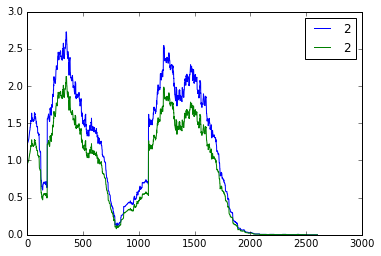

In [260]:
plt.plot(mycn_df.index, mycn_df[2]/mean);
plt.plot(mycn_df.index, mycn_df[2]/(mean+100));
plt.legend()

In [274]:
def plot_cov (samples, gene):
    gene_dict = {"BRCA1":17, "MYCN":2, "SMARCB1":22}
    chrom = gene_dict[gene]
    
    for sample in samples:
        print("## processing sample {} ##".format(sample))
        cpb_file = analysis_folder_path+'/'+ sample
        print(cpb_file)
        sample_df = pd.read_csv(cpb_file, header=None, sep="\t") 
        gene_df = sample_df[sample_df[0]==chrom].copy()
        gene_df = gene_df.reset_index()
        #print(gene_df.index)
        covvtot = gene_df[2].sum()
        length = len(gene_df.index)
        print("Total cov {} and length {}".format(covtot, length))

        mean = covtot/length
        print("mean cov: {}".format(mean))
        
        plt.plot(gene_df.index, gene_df[2]);
    

In [276]:
def plot_cov_gene_norm (samples, gene):
    gene_dict = {"BRCA1":17, "MYCN":2, "SMARCB1":22}
    chrom = gene_dict[gene]
    
    for sample in samples:
        print("## processing sample {} ##".format(sample))
        cpb_file = analysis_folder_path+'/'+ sample
        print(cpb_file)
        sample_df = pd.read_csv(cpb_file, header=None, sep="\t") 
        gene_df = sample_df[sample_df[0]==chrom].copy()
        gene_df = gene_df.reset_index()
        covvtot = gene_df[2].sum()
        length = len(gene_df.index)
        print("Total cov {} and length {}".format(covtot, length))

        mean = covtot/length
        print("mean: {}".format(mean))
        
        plt.plot(gene_df.index, gene_df[2]/mean);
    

In [277]:
def plot_cov_tot_norm (samples, gene):
    gene_dict = {"BRCA1":17, "MYCN":2, "SMARCB1":22}
    chrom = gene_dict[gene]
    
    for sample in samples:
        print("## processing sample {} ##".format(sample))
        cpb_file = analysis_folder_path+'/'+ sample
        print(cpb_file)
        sample_df = pd.read_csv(cpb_file, header=None, sep="\t") 
        gene_df = sample_df[sample_df[0]==chrom].copy()
        gene_df = gene_df.reset_index()
        covvtot = sample_df[2].sum()
        length = len(sample_df.index)
        print("Total cov {} and length {}".format(covtot, length))

        mean = covtot/length
        print("mean: {}".format(mean))
        
        plt.plot(gene_df.index, gene_df[2]/mean);
    

## Plot coverage


['id10a_grp.rmdup.roisorted_rehead.depth.cpb', 'id10b_grp.rmdup.roisorted_rehead.depth.cpb', 'id11a_grp.rmdup.roisorted_rehead.depth.cpb', 'id11b_grp.rmdup.roisorted_rehead.depth.cpb', 'id12a_grp.rmdup.roisorted_rehead.depth.cpb', 'id12b_grp.rmdup.roisorted_rehead.depth.cpb', 'id13a_grp.rmdup.roisorted_rehead.depth.cpb', 'id13b_grp.rmdup.roisorted_rehead.depth.cpb']
## processing sample id10a_grp.rmdup.roisorted_rehead.depth.cpb ##
/Volumes/miniSD/tmp_misc/code/coverages_data-test/class_2017/id10a_grp.rmdup.roisorted_rehead.depth.cpb
Total cov 924360 and length 7491
mean cov: 123.39607529034842
## processing sample id10b_grp.rmdup.roisorted_rehead.depth.cpb ##
/Volumes/miniSD/tmp_misc/code/coverages_data-test/class_2017/id10b_grp.rmdup.roisorted_rehead.depth.cpb
Total cov 924360 and length 7491
mean cov: 123.39607529034842
## processing sample id11a_grp.rmdup.roisorted_rehead.depth.cpb ##
/Volumes/miniSD/tmp_misc/code/coverages_data-test/class_2017/id11a_grp.rmdup.roisorted_rehead.dept

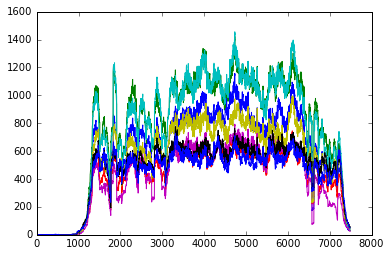

In [275]:
samples = cpb_files[0:8]
print(samples)
gene="BRCA1"
plot_cov(samples,gene)

In [247]:
samples = cpb_files[0:8]
samples

['id10a_grp.rmdup.roisorted_rehead.depth.cpb',
 'id10b_grp.rmdup.roisorted_rehead.depth.cpb',
 'id11a_grp.rmdup.roisorted_rehead.depth.cpb',
 'id11b_grp.rmdup.roisorted_rehead.depth.cpb',
 'id12a_grp.rmdup.roisorted_rehead.depth.cpb',
 'id12b_grp.rmdup.roisorted_rehead.depth.cpb',
 'id13a_grp.rmdup.roisorted_rehead.depth.cpb',
 'id13b_grp.rmdup.roisorted_rehead.depth.cpb']

In [250]:
gene="BRCA1"

## processing sample id10a_grp.rmdup.roisorted_rehead.depth.cpb ##
/Volumes/miniSD/tmp_misc/code/coverages_data-test/class_2017/id10a_grp.rmdup.roisorted_rehead.depth.cpb
Total cov 924360 and length 7491
mean: 123.39607529034842
## processing sample id10b_grp.rmdup.roisorted_rehead.depth.cpb ##
/Volumes/miniSD/tmp_misc/code/coverages_data-test/class_2017/id10b_grp.rmdup.roisorted_rehead.depth.cpb
Total cov 924360 and length 7491
mean: 123.39607529034842
## processing sample id11a_grp.rmdup.roisorted_rehead.depth.cpb ##
/Volumes/miniSD/tmp_misc/code/coverages_data-test/class_2017/id11a_grp.rmdup.roisorted_rehead.depth.cpb
Total cov 924360 and length 7491
mean: 123.39607529034842
## processing sample id11b_grp.rmdup.roisorted_rehead.depth.cpb ##
/Volumes/miniSD/tmp_misc/code/coverages_data-test/class_2017/id11b_grp.rmdup.roisorted_rehead.depth.cpb
Total cov 924360 and length 7491
mean: 123.39607529034842
## processing sample id12a_grp.rmdup.roisorted_rehead.depth.cpb ##
/Volumes/miniSD/t

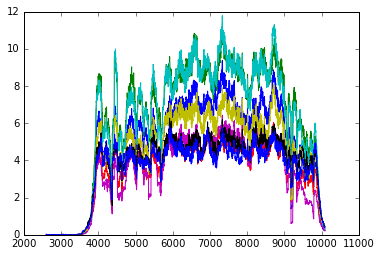

In [251]:
plot_cov_gene_norm(samples,gene)

## processing sample id10a_grp.rmdup.roisorted_rehead.depth.cpb ##
/Volumes/miniSD/tmp_misc/code/coverages_data-test/class_2017/id10a_grp.rmdup.roisorted_rehead.depth.cpb
Total cov 924360 and length 11848
mean: 78.01823092505064
## processing sample id10b_grp.rmdup.roisorted_rehead.depth.cpb ##
/Volumes/miniSD/tmp_misc/code/coverages_data-test/class_2017/id10b_grp.rmdup.roisorted_rehead.depth.cpb
Total cov 924360 and length 11848
mean: 78.01823092505064
## processing sample id11a_grp.rmdup.roisorted_rehead.depth.cpb ##
/Volumes/miniSD/tmp_misc/code/coverages_data-test/class_2017/id11a_grp.rmdup.roisorted_rehead.depth.cpb
Total cov 924360 and length 11848
mean: 78.01823092505064
## processing sample id11b_grp.rmdup.roisorted_rehead.depth.cpb ##
/Volumes/miniSD/tmp_misc/code/coverages_data-test/class_2017/id11b_grp.rmdup.roisorted_rehead.depth.cpb
Total cov 924360 and length 11848
mean: 78.01823092505064


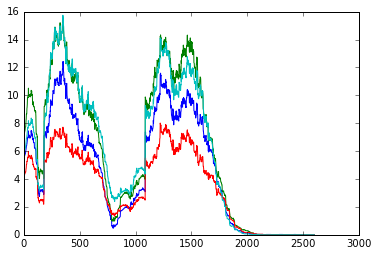

In [246]:
plot_cov_tot_norm(samples,gene)

In [252]:
def even_items(list):
    return list[1::2]

def odd_items(list):
    return list[0::2]

['id10b_grp.rmdup.roisorted_rehead.depth.cpb', 'id11b_grp.rmdup.roisorted_rehead.depth.cpb', 'id12b_grp.rmdup.roisorted_rehead.depth.cpb', 'id13b_grp.rmdup.roisorted_rehead.depth.cpb', 'id14b_grp.rmdup.roisorted_rehead.depth.cpb', 'id2b_grp.rmdup.roisorted_rehead.depth.cpb', 'id3b_grp.rmdup.roisorted_rehead.depth.cpb', 'id9b_grp.rmdup.roisorted_rehead.depth.cpb']
## processing sample id10b_grp.rmdup.roisorted_rehead.depth.cpb ##
/Volumes/miniSD/tmp_misc/code/coverages_data-test/class_2017/id10b_grp.rmdup.roisorted_rehead.depth.cpb
Total cov 924360 and length 11848
mean: 78.01823092505064
## processing sample id11b_grp.rmdup.roisorted_rehead.depth.cpb ##
/Volumes/miniSD/tmp_misc/code/coverages_data-test/class_2017/id11b_grp.rmdup.roisorted_rehead.depth.cpb
Total cov 924360 and length 11848
mean: 78.01823092505064
## processing sample id12b_grp.rmdup.roisorted_rehead.depth.cpb ##
/Volumes/miniSD/tmp_misc/code/coverages_data-test/class_2017/id12b_grp.rmdup.roisorted_rehead.depth.cpb
Total

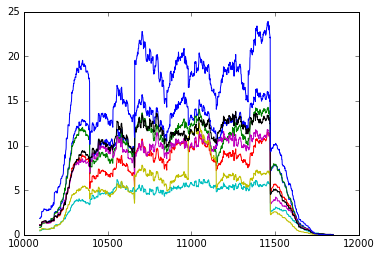

In [257]:
samples = even_items(cpb_files)
print(samples)
gene = "SMARCB1"
plot_cov_tot_norm(samples,gene)

['id10a_grp.rmdup.roisorted_rehead.depth.cpb', 'id11a_grp.rmdup.roisorted_rehead.depth.cpb', 'id12a_grp.rmdup.roisorted_rehead.depth.cpb', 'id13a_grp.rmdup.roisorted_rehead.depth.cpb', 'id14a_grp.rmdup.roisorted_rehead.depth.cpb', 'id2a_grp.rmdup.roisorted_rehead.depth.cpb', 'id3a_grp.rmdup.roisorted_rehead.depth.cpb', 'id9a_grp.rmdup.roisorted_rehead.depth.cpb']
## processing sample id10a_grp.rmdup.roisorted_rehead.depth.cpb ##
/Volumes/miniSD/tmp_misc/code/coverages_data-test/class_2017/id10a_grp.rmdup.roisorted_rehead.depth.cpb
Total cov 924360 and length 11848
mean: 78.01823092505064
## processing sample id11a_grp.rmdup.roisorted_rehead.depth.cpb ##
/Volumes/miniSD/tmp_misc/code/coverages_data-test/class_2017/id11a_grp.rmdup.roisorted_rehead.depth.cpb
Total cov 924360 and length 11848
mean: 78.01823092505064
## processing sample id12a_grp.rmdup.roisorted_rehead.depth.cpb ##
/Volumes/miniSD/tmp_misc/code/coverages_data-test/class_2017/id12a_grp.rmdup.roisorted_rehead.depth.cpb
Total

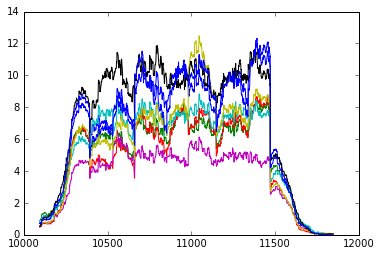

In [259]:
samples = odd_items(cpb_files)
print(samples)
gene = "SMARCB1"
plot_cov_tot_norm(samples,gene)